# Task 1 from spark foundation

# Prediction using Supervised ML
(Student's Percentage Prediction Model )


# Author: Bhavana Mishra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading CSV file 

In [2]:
student_data = pd.read_csv('http://bit.ly/w-data')

In [3]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Describing Data

In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Dimension of the DataFrrame 

In [5]:

student_data.shape

(25, 2)

# Graphical view of the data


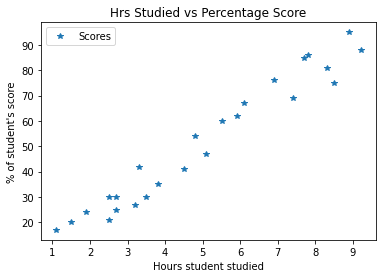

In [6]:

student_data.plot(x='Hours', y='Scores', style='*') 
plt.title('Hrs Studied vs Percentage Score')
plt.xlabel('Hours student studied')
plt.ylabel('% of student\'s score') 
plt.show()


# Spliting the data into input and output


In [7]:

X = student_data.iloc[:,:-1].values
y = student_data.iloc[:, 1].values


# Divide the data into train and test dataset


In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=0)


# Fitting Linear Regression to the Training set



In [10]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

# visualising the training data


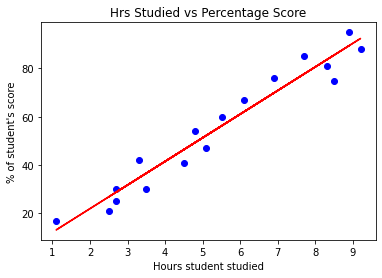

In [12]:

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Hrs Studied vs Percentage Score')
plt.xlabel('Hours student studied')
plt.ylabel('% of student\'s score') 
plt.show()


# Visualising the testing data


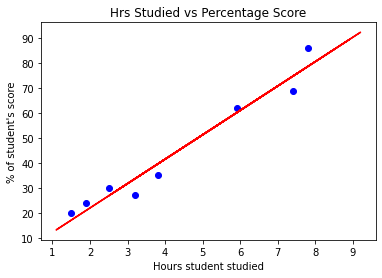

In [13]:

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Hrs Studied vs Percentage Score')
plt.xlabel('Hours student studied')
plt.ylabel('% of student\'s score') 
plt.show()

# Predicting the Test set results


In [14]:

y_pred = linear_regression.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

# Comparing the Actual and Predicted Value (in tabular form).


In [15]:

df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred})  
df

,Actual Value,Predicted value
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Visualizing the difference between Actual and Predicted Value


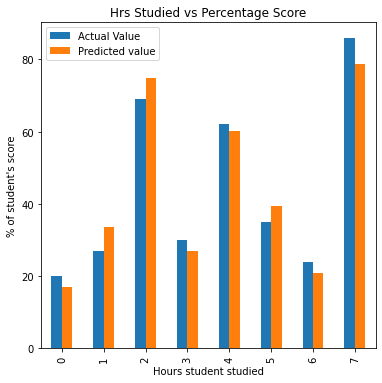

In [16]:

df.plot(kind="bar", figsize=(6,6))
plt.title('Hrs Studied vs Percentage Score')
plt.xlabel('Hours student studied')
plt.ylabel('% of student\'s score') 
plt.show()

# Estimating training and test score


In [17]:

print("Training Score: ",linear_regression.score(X_train,y_train))
print("Test Score: ",linear_regression.score(X_test,y_test))



Training Score:  0.9484997422695115
Test Score:  0.9568211104435257


# Predicted score if a student studies for 9.25 hrs/ day


In [18]:

hrs = [9.25] 
ans = linear_regression.predict([hrs])
print("Hours student study = {}".format(hrs))
print("Predicted Score of student = {}".format(ans[0]))

Hours student study = [9.25]
Predicted Score of student = 92.91505723477056


# Finding the residuals : It is very important to calculate the performance of the model.


In [19]:

from sklearn import metrics
print('Mean Absolute Error => ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error => ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squred Error => ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error =>  4.419727808027651
Mean Square Error =>  22.965097212700428
Root Mean Squred Error =>  4.7921912746363144


# An approx. 93 (percent) is achieved by student if he studies for 9.25 hrs/day.